# Simulación de ventas de café

Vamos a realizar la simulación de ventas de café de una cafetería de la cual se tiene un muestreo limitado.

- Se tiene un muestreo correspondiente al horario de **3:00 a 4:00 pm**
- En ese intervalo se registró la venta de **15 cafés**

Otros datos proporcionados son que existen **2 picos de actividad** los cuales ocurren:
- De **7:30 am a 8:30 am** aproximadamente
- De **6:30 pm a 8:00 pm** que es la hora de cierre

Agregare **1 pico de actividad mas** 
-Justo a medio día **12:00pm**


Con estos datos vamos a proceder haciendo una simulación de una tasa de ventas variable.

# Distribución de Poisson
* La distribución de Poisson es una **distribución discreta de probabilidad** que expresa la probabilidad de un número dado de eventos que ocurren en un intervalo fijo de tiempo, estos eventos pasan con una tasa promedio conocida y de modo independiente un evento de otro. 

# Definición de la distribución de Poisson

En un proceso de Poisson homogéneo (en este caso homogeneo se refiere a una tasa de constante), el número de eventos en un intervalo de longitud **$t$** sigue la distribución:

$$
N(t) \sim \text{Poisson}(\lambda t)
$$

cuya función de masa de probabilidad es:

$$
P(N(t)=k) =
\frac{(\lambda t)^k e^{-\lambda t}}{k!}
$$

# **Sin embargo en este caso la tasa $\lambda$ es variable y podemos modelarla como parte del proceso que no homogeneo de Poisson**

En este caso la tasa de llegada de clientes se modela mediante una función de intensidad dependiente del tiempo:

$$
\lambda(t) = B + \sum_{i=1}^{k}
A_i \exp\left(-\frac{(t-\mu_i)^2}{2\sigma_i^2}\right)
$$

donde:

- $B$ es el nivel base de demanda
- $A_i$ es la intensidad máxima del pico $i$
- $\mu_i $ es la hora central del pico
- $\sigma_i$ controla la duración del pico

# **Importante: Cada uno de los picos se modela mediante un nuevo termino en la sumatoria (en este caso nosotros tenemos 3 picos y corresponderan únicamente 3 terminos).**


En este caso, se consideran tres picos de actividad 8:00 am, 12:00 pm y 6:30 pm, por lo que la función de intensidad (tasa de ventas) queda como:

$$
\lambda(t) =
B
+ A_1 \exp\left(-\frac{(t-8)^2}{2\sigma_1^2}\right)
+ A_2 \exp\left(-\frac{(t-12)^2}{2\sigma_2^2}\right)
+ A_3 \exp\left(-\frac{(t-18.5)^2}{2\sigma_3^2}\right)
$$

$t$ se mide en horas y $\lambda(t)$ representa cafés por hora.
El parámetro $B$ se obtiene imponiendo la condición observada a las 15:00 hrs:

$$
\lambda(15 hrs) = 15 ventas
$$

lo que implica:

$$
B = 15 -
\left[
A_1 e^{-\frac{(15-8)^2}{2\sigma_1^2}}
+ A_2 e^{-\frac{(15-12)^2}{2\sigma_2^2}}
+ A_3 e^{-\frac{(15-18.5)^2}{2\sigma_3^2}}
\right]
$$

Valor calculado de B (nivel base): 12.54


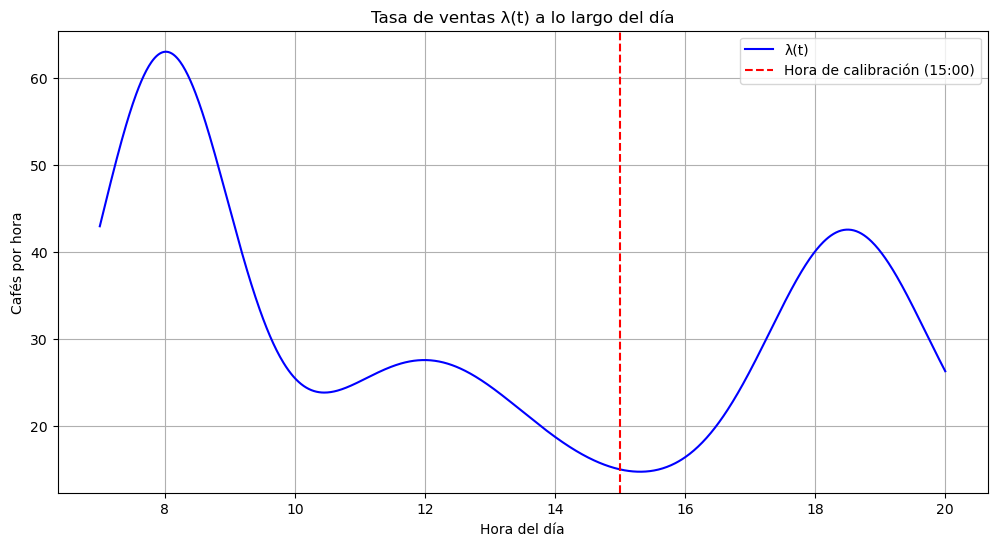

λ(15) = 15.00
λ(8)  = 62.97
λ(12) = 27.56
λ(18.5) = 42.54


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Parametros del modelo --------
mu1, sigma1, A1 = 8, 1.0, 50      # Pico mañana
mu2, sigma2, A2 = 12, 1.5, 15     # Mediodía
mu3, sigma3, A3 = 18.5, 1.2, 30   # Pico tarde

# -------- Funcion gaussiana --------
def gaussian(t, A, mu, sigma):
    return A * np.exp(-((t - mu)**2) / (2 * sigma**2)) #Cada Gaussiana simula un pico de ventas en un momento del día

# -------- Resolver B usando la condicion lambda(15) = 15 --------
t_cal = 15 # Hora de calibración

g1_15 = gaussian(t_cal, A1, mu1, sigma1)
g2_15 = gaussian(t_cal, A2, mu2, sigma2)
g3_15 = gaussian(t_cal, A3, mu3, sigma3)

B = 15 - (g1_15 + g2_15 + g3_15) #calculo de B para que la tasa de ventas a las 15:00 sea exactamente 15 cafés por hora

print(f"Valor calculado de B (nivel base): {B:.2f}")

# -------- Definicion de lambda(t) --------
def lambda_t(t):
    return (
        B
        + gaussian(t, A1, mu1, sigma1)
        + gaussian(t, A2, mu2, sigma2)
        + gaussian(t, A3, mu3, sigma3)
    )

# -------- Dominio de tiempo --------
t = np.linspace(7, 20, 1000)
lam = lambda_t(t)

# -------- Graficar --------
plt.figure(figsize=(12,6))
plt.plot(t, lam, label='λ(t)', color='blue')
plt.axvline(15, linestyle='--', color='red', label='Hora de calibración (15:00)')
plt.title("Tasa de ventas λ(t) a lo largo del día")
plt.xlabel("Hora del día")
plt.ylabel("Cafés por hora")
plt.grid(True)
plt.legend()
plt.show()

# -------- Verificacion puntual --------
print(f"λ(15) = {lambda_t(15):.2f}")
print(f"λ(8)  = {lambda_t(8):.2f}")
print(f"λ(12) = {lambda_t(12):.2f}")
print(f"λ(18.5) = {lambda_t(18.5):.2f}")


# Simulando mediante Poisson

En un proceso de Poisson no homogéneo, la tasa depende del tiempo y el número de eventos en el intervalo $[a,b]$ satisface:

$$
N(a,b) \sim \text{Poisson}\left(
\int_a^b \lambda(t)\,dt
\right)
$$

Recordemos que Poisson en este caso es:

$$
P(N(t)=k) =
\frac{(\lambda t)^k e^{-\lambda t}}{k!}
$$

La probabilidad de observar $k$ eventos en el intervalo $[a,b]$ es:

$$
P(N(a,b)=k) =
\frac{
\left(
\int_a^b \lambda(t)\,dt
\right)^k
\exp\left(
- \int_a^b \lambda(t)\,dt
\right)
}{k!}
$$

Condicionado a $\lambda(t)$, los eventos son independientes, es decir la compra anterior no afecta a la siguiente.

Esta integral la resolveremos numericamente por el metodo del trapezoide



Para cada hora $h$, el número de cafés vendidos se modela como:

$$
N_h \sim \text{Poisson}(\mu_h),
\quad
\mu_h = \int_h^{h+1} \lambda(t)\,dt
$$

## Integración numérica de $\lambda(t)$

Para calcular la intensidad acumulada en un intervalo de tiempo $[a,b]$,
necesitamos evaluar la integral:

$$
\int_a^b \lambda(t)\,dt
$$

Dado que $\lambda(t)$ es una función dependiente del tiempo y no siempre
admite una solución analítica sencilla, utilizamos un método numérico de
integración: **el método del trapecio**.

Este método aproxima el área bajo la curva dividiendo el intervalo en pequeños
subintervalos y sumando áreas de trapecios.

La aproximación numérica es:

$$
\int_a^b \lambda(t)\,dt \;\approx\; 
\sum_{i=1}^{n-1}
\frac{\lambda(t_i) + \lambda(t_{i+1})}{2}
\,(t_{i+1}-t_i)
$$


# Simulando un día

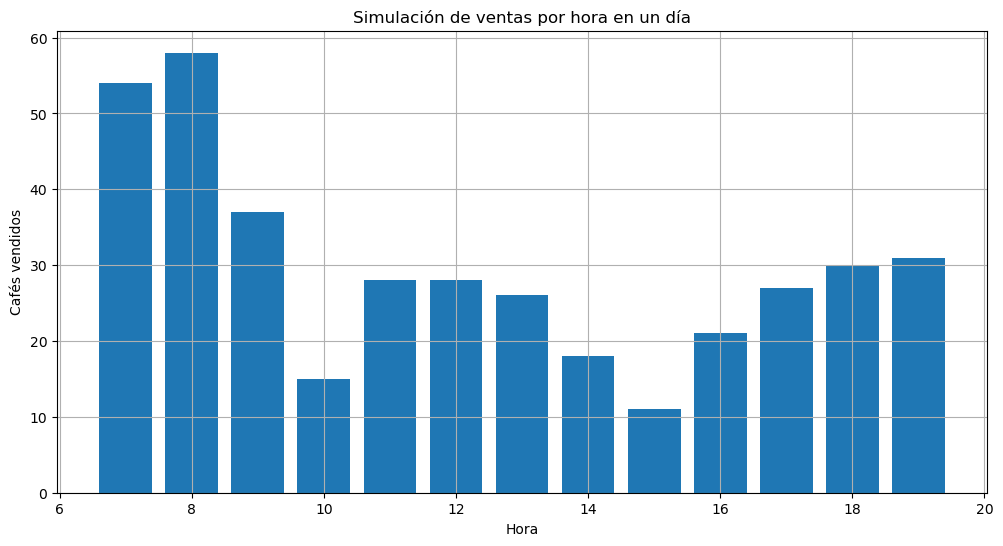

Ventas totales del día: 384
Ganancia total del día: $5760
Simulado un día de ventas...


In [2]:
# -------- Funcion para integrar lambda en una hora --------
def integral_lambda(a, b, steps=100):
    ts = np.linspace(a, b, steps)
    vals = lambda_t(ts)
    return np.trapz(vals, ts)

# -------- Simular un dia completo --------
def simular_un_dia():
    horas = np.arange(7, 20)  # 7 a 19 -> intervalos [7-8],...,[19-20]
    ventas_por_hora = []

    for h in horas:
        media_hora = integral_lambda(h, h+1)
        ventas = np.random.poisson(media_hora)
        ventas_por_hora.append(ventas)

    return horas, np.array(ventas_por_hora)


horas, ventas = simular_un_dia()

plt.figure(figsize=(12,6))
plt.bar(horas, ventas, width=0.8)
plt.title("Simulación de ventas por hora en un día")
plt.xlabel("Hora")
plt.ylabel("Cafés vendidos")
plt.grid(True)
plt.show()

print(f"Ventas totales del día: {ventas.sum()}")
ganancia = ventas.sum() * 15

print(f"Ganancia total del día: ${ganancia}")

print("Simulado un día de ventas...")


# Simular varios días
Podemos ajustar el número de días

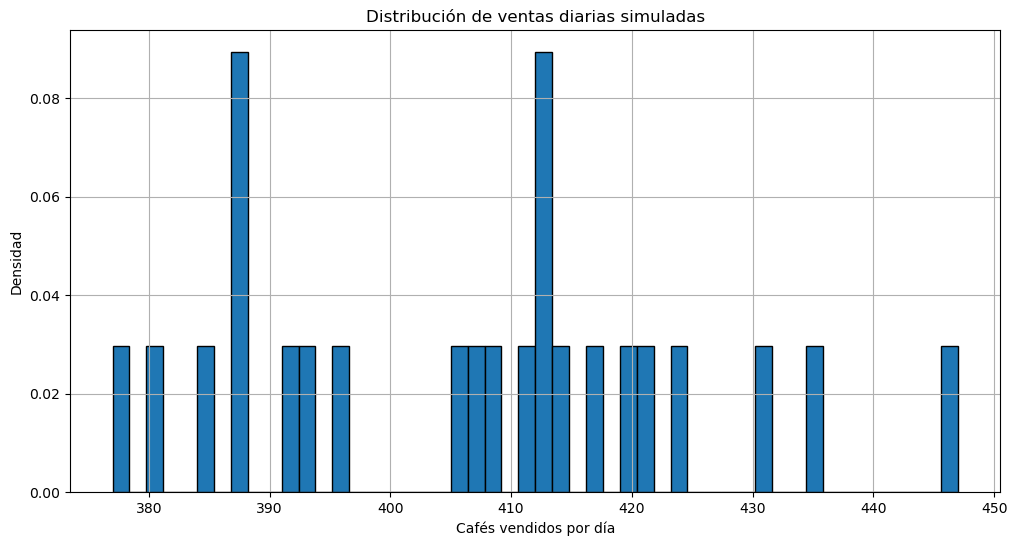

Media diaria esperada: 406.71
Desviación estándar: 17.90
Percentil 5%: 381.60
Percentil 95%: 434.40


Simulados 24 días de ventas...


In [3]:
n_dias = 24
def simular_muchos_dias(n_dias):
    dia_ventas = []

    for _ in range(n_dias):
        _, ventas = simular_un_dia()
        dia_ventas.append(ventas.sum())
    return np.array(dia_ventas)

dia_ventas = simular_muchos_dias(n_dias)

plt.figure(figsize=(12,6))
plt.hist(dia_ventas, bins=50, density=True, edgecolor='black')
plt.title("Distribución de ventas diarias simuladas")
plt.xlabel("Cafés vendidos por día")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

print(f"Media diaria esperada: {dia_ventas.mean():.2f}")
print(f"Desviación estándar: {dia_ventas.std():.2f}")
print(f"Percentil 5%: {np.percentile(dia_ventas,5):.2f}")
print(f"Percentil 95%: {np.percentile(dia_ventas,95):.2f}")

print(f"\n\nSimulados {n_dias} días de ventas...")

# Todo esto lo haremos para ahora ver la planeación de demanda de café 
Sabemos que para producir un café de 16 oz, necesitamos 20g de café molido

El consumo diario promedio de café es: 8.13 kg


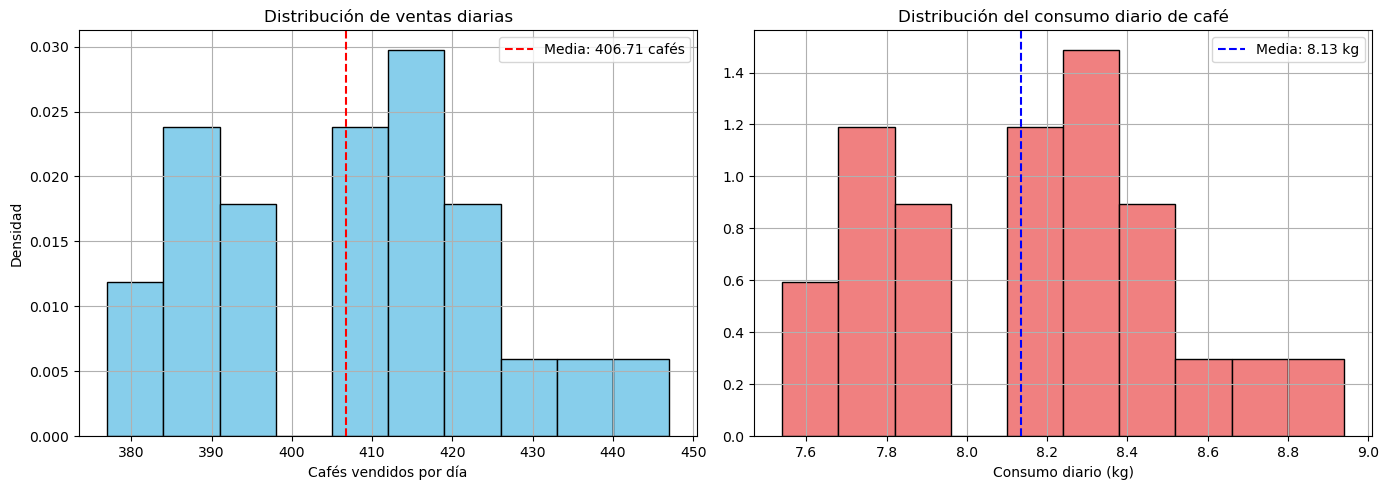

In [4]:
# Cantidad necesaria en gramos de café para abastecer la demanda diaria simulada
gr_por_cafe = 20

consumo_diario_kg = dia_ventas * gr_por_cafe/1000

venta_promedio = dia_ventas.mean()
consumo_diario_promedio_kg = consumo_diario_kg.mean()

print(f"El consumo diario promedio de café es: {consumo_diario_promedio_kg:.2f} kg")


# -------- Visualización: dos gráficas lado a lado --------
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# --- Gráfica 1: Ventas diarias ---
axes[0].hist(dia_ventas, bins=10, density=True, edgecolor='black', color = 'skyblue')
axes[0].axvline(venta_promedio, color='red', linestyle='--', label=f'Media: {venta_promedio:.2f} cafés')
axes[0].set_title("Distribución de ventas diarias")
axes[0].set_xlabel("Cafés vendidos por día")
axes[0].set_ylabel("Densidad")
axes[0].grid(True)
axes[0].legend()

# --- Gráfica 2: Consumo diario de café ---
axes[1].hist(consumo_diario_kg, bins=10, density=True, edgecolor='black', color = 'lightcoral')
axes[1].set_title("Distribución del consumo diario de café")
axes[1].set_xlabel("Consumo diario (kg)")
axes[1].grid(True)
axes[1].axvline(consumo_diario_promedio_kg, color='b', linestyle='--', label=f'Media: {consumo_diario_promedio_kg:.2f} kg')
axes[1].legend()
plt.tight_layout()
plt.show()


Podemos ver que el consumo diario de cafe ronda entorno al promedio del día.

Vamos a calcular el Stock de Seguridad $SS$ 

$
SS = P95 - media
$

Percentil 5% del consumo diario de café: 7.63 kg
Percentil 95% del consumo diario de café: 8.69 kg

Consumo diario promedio de café: 8.13 kg
Stock de seguridad (SS) recomendado: 0.55 kg

Esto significa que para cubrir el 95% de los días, deberíamos tener un stock de seguridad de aproximadamente 0.55 kg de café, además del consumo diario promedio.
Sin embargo si podemos ver en un día bajo lo que tendremos es que el consumo diario de café podría ser tan bajo como 7.63 kg


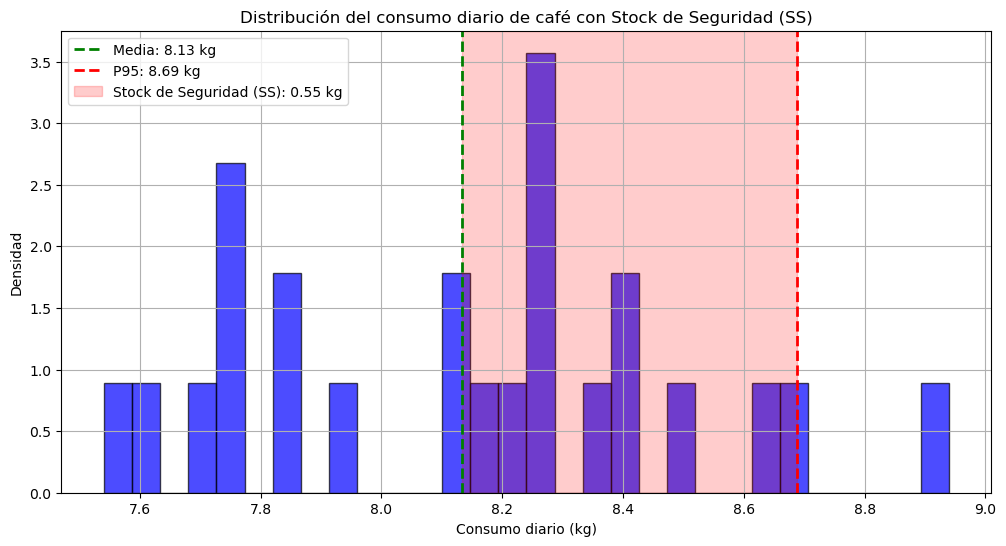

In [5]:
#Vamos a proceder a calcular los percentiles para el café

percentil_95_consumo_diario_kg = np.percentile(consumo_diario_kg, 95)
percentil_5_consumo_diario_kg = np.percentile(consumo_diario_kg, 5)

print(f"Percentil 5% del consumo diario de café: {percentil_5_consumo_diario_kg:.2f} kg")
print(f"Percentil 95% del consumo diario de café: {percentil_95_consumo_diario_kg:.2f} kg")



#Calculemos el stock de seguridad SS 
SS = percentil_95_consumo_diario_kg - consumo_diario_promedio_kg

print(f"\nConsumo diario promedio de café: {consumo_diario_promedio_kg:.2f} kg")
print(f"Stock de seguridad (SS) recomendado: {SS:.2f} kg")

print(f"\nEsto significa que para cubrir el 95% de los días, deberíamos tener un stock de seguridad de aproximadamente {SS:.2f} kg de café, además del consumo diario promedio.")
print(f"Sin embargo si podemos ver en un día bajo lo que tendremos es que el consumo diario de café podría ser tan bajo como {percentil_5_consumo_diario_kg:.2f} kg")

plt.figure(figsize=(12,6))

# Histograma
plt.hist(consumo_diario_kg, bins=30, density=True, edgecolor='black', color='blue', alpha=0.7)

# Líneas verticales
plt.axvline(consumo_diario_promedio_kg, color='green', linestyle='--', linewidth=2, label=f'Media: {consumo_diario_promedio_kg:.2f} kg')

plt.axvline(percentil_95_consumo_diario_kg, color='red', linestyle='--', linewidth=2, label=f'P95: {percentil_95_consumo_diario_kg:.2f} kg')

# Sombrear el Stock de Seguridad (SS)
plt.axvspan(consumo_diario_promedio_kg, percentil_95_consumo_diario_kg, color='red', alpha=0.2, label=f'Stock de Seguridad (SS): {SS:.2f} kg')

plt.title("Distribución del consumo diario de café con Stock de Seguridad (SS)")
plt.xlabel("Consumo diario (kg)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()